In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   Distance           199999 non-null  float64
 7   second             199999 non-null  int64  
 8   minute             199999 non-null  int64  
 9   hour               199999 non-null  int64  
 10  day                199999 non-null  int64  
 11  month              199999 non-null  int64  
 12  year               199999 non-null  int64  
 13  dayofweek          199999 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 21.4 MB


In [4]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,second,minute,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,6,52,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,56,4,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,0,45,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,21,22,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,0,47,17,28,8,2014,3


In [5]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,second,minute,hour,day,month,year,dayofweek
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,20.855350,15.801609,29.534848,13.491387,15.704739,6.281791,2011.742434,3.048435
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,382.964642,19.430352,17.335443,6.515505,8.687377,3.438933,1.856400,1.946946
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.215222,0.000000,14.000000,9.000000,8.000000,3.000000,2010.000000,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2.120992,3.000000,30.000000,14.000000,16.000000,6.000000,2012.000000,3.000000
75%,12.500000,-73.967154,40.767158,-73.963659,40.768001,2.000000,3.875169,32.000000,45.000000,19.000000,23.000000,9.000000,2013.000000,5.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135,59.000000,59.000000,23.000000,31.000000,12.000000,2015.000000,6.000000


In [8]:
df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Distance             0
second               0
minute               0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dtype: int64

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
Distance             float64
second                 int64
minute                 int64
hour                   int64
day                    int64
month                  int64
year                   int64
dayofweek              int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   Distance           199999 non-null  float64
 7   second             199999 non-null  int64  
 8   minute             199999 non-null  int64  
 9   hour               199999 non-null  int64  
 10  day                199999 non-null  int64  
 11  month              199999 non-null  int64  
 12  year               199999 non-null  int64  
 13  dayofweek          199999 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 21.4 MB


In [14]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,second,minute,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,6,52,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,56,4,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,0,45,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,21,22,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,0,47,17,28,8,2014,3


Text(0, 0.5, 'fare_amount')

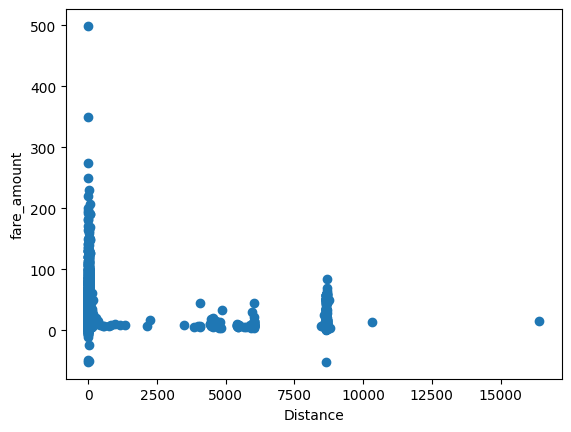

In [15]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

<AxesSubplot: >

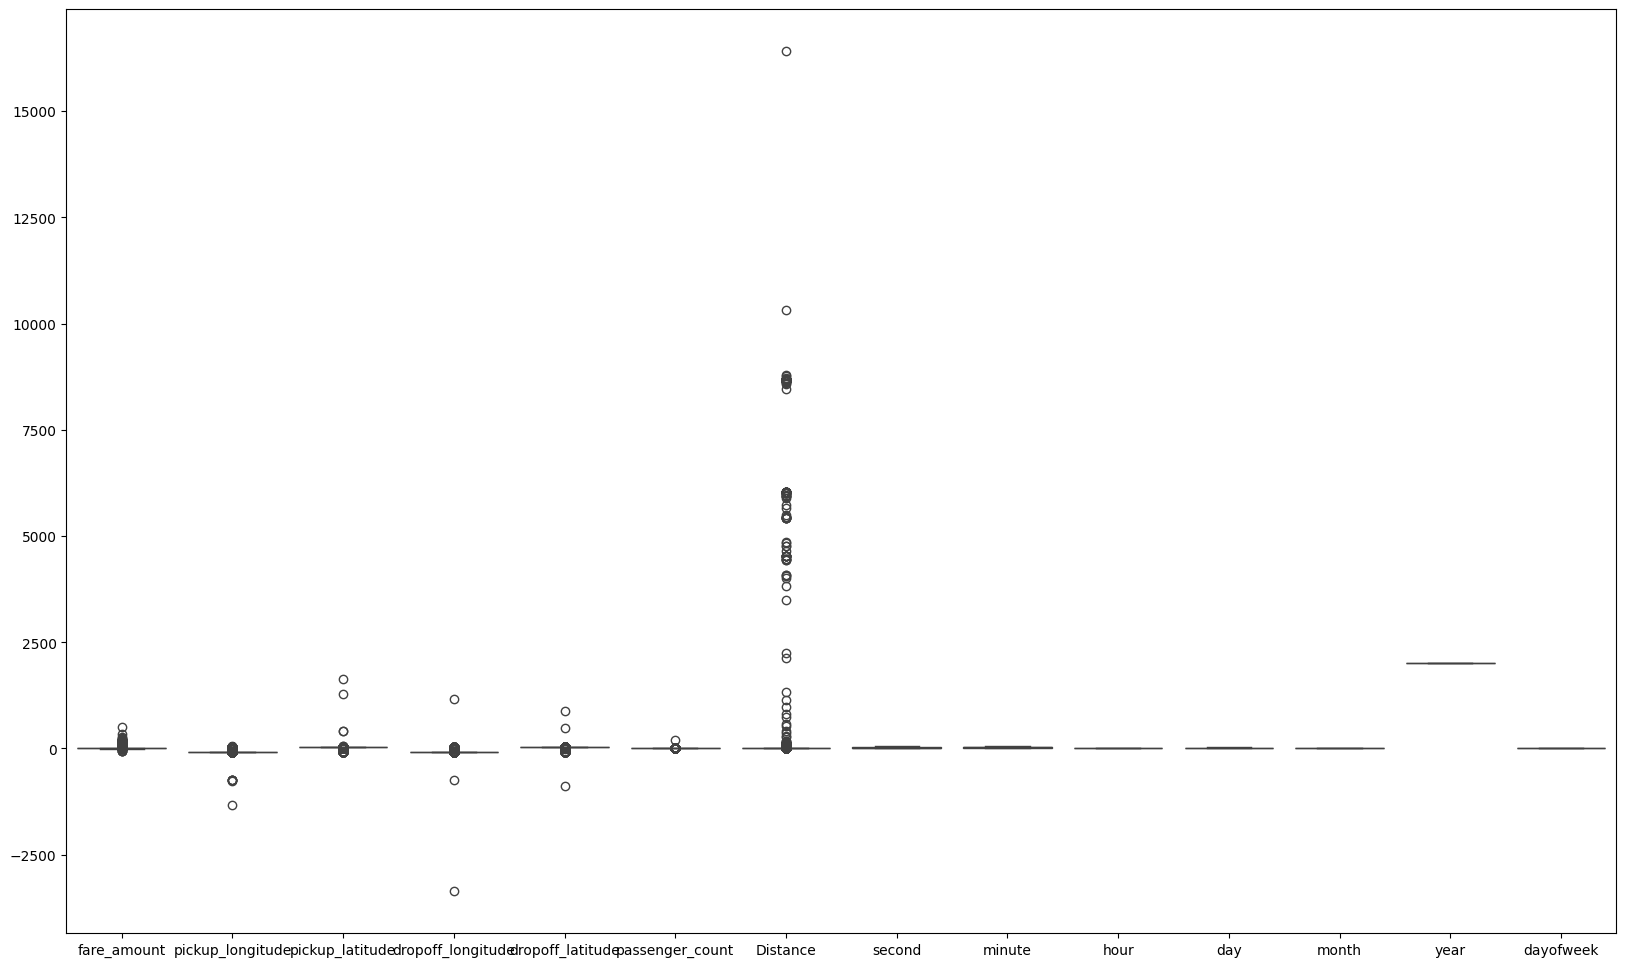

In [16]:
plt.figure(figsize=(20,12))
sns.boxplot(data = df)

In [17]:
df.drop(df[df['Distance'] >= 60].index, inplace = True)
df.drop(df[df['fare_amount'] <= 0].index, inplace = True)

df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True )

Text(0, 0.5, 'fare_amount')

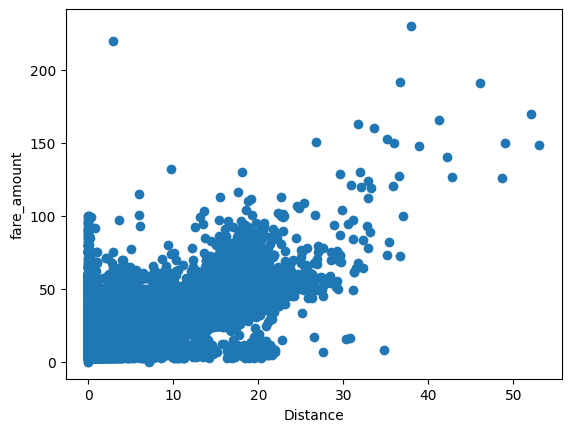

In [18]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [19]:
corr = df.corr()

corr.style.background_gradient(cmap='BuGn')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,second,minute,hour,day,month,year,dayofweek
fare_amount,1.000000,0.005885,-0.006253,0.005501,-0.006142,0.011693,0.857729,-0.000995,-0.007795,-0.020692,0.001059,0.023759,0.121195,0.006181
pickup_longitude,0.005885,1.000000,-0.973204,0.999992,-0.981941,-0.000649,-0.117044,-0.014677,0.002796,0.001547,0.005300,-0.002667,0.005907,0.003006
pickup_latitude,-0.006253,-0.973204,1.000000,-0.973206,0.991076,-0.001190,0.110843,0.016809,-0.002295,-0.001823,-0.008901,0.004098,-0.008466,-0.004787
dropoff_longitude,0.005501,0.999992,-0.973206,1.000000,-0.981942,-0.000650,-0.117282,-0.014638,0.002803,0.001316,0.005307,-0.002656,0.005878,0.003082
dropoff_latitude,-0.006142,-0.981941,0.991076,-0.981942,1.000000,-0.001035,0.109486,0.017202,-0.002593,-0.001460,-0.008900,0.004143,-0.008553,-0.004648
passenger_count,0.011693,-0.000649,-0.001190,-0.000650,-0.001035,1.000000,0.007784,-0.202987,0.000733,0.013226,0.003146,0.009921,0.004841,0.033360
Distance,0.857729,-0.117044,0.110843,-0.117282,0.109486,0.007784,1.000000,-0.000350,-0.007998,-0.031855,0.000008,0.011622,0.028619,0.016905
second,-0.000995,-0.014677,0.016809,-0.014638,0.017202,-0.202987,-0.000350,1.000000,0.001893,-0.013419,-0.002100,-0.049734,0.083106,-0.000113
minute,-0.007795,0.002796,-0.002295,0.002803,-0.002593,0.000733,-0.007998,0.001893,1.000000,0.001352,-0.001255,-0.001606,-0.002687,-0.002405
hour,-0.020692,0.001547,-0.001823,0.001316,-0.001460,0.013226,-0.031855,-0.013419,0.001352,1.000000,0.004849,-0.003989,0.002171,-0.086995


In [20]:
X = df['Distance'].values.reshape(-1, 1)        #Independent Variable
y = df['fare_amount'].values.reshape(-1, 1)     #Dependent Variable

In [21]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)

x_std = std.fit_transform(X)
print(x_std)

[[-0.39820843]
 [-0.37738556]
 [ 0.1640092 ]
 ...
 [ 2.03806797]
 [ 0.3305922 ]
 [ 0.28894645]]
[[-0.43819769]
 [-0.22258873]
 [ 0.49552213]
 ...
 [ 2.67145829]
 [ 0.07874908]
 [ 0.60173174]]


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.74
Test set score: 0.7340468


In [24]:
y_pred = l_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']] = y_test
result[['Predicted']] = y_pred

result.sample(10)

,Actual,Predicted
36054,-0.398208,-0.293309
26447,-0.502323,-0.584901
22384,-0.668906,-0.613220
1506,-0.502323,-0.532737
32052,3.495669,3.234649
2060,-0.033808,-0.157132
19262,-0.710552,-0.494343
11568,0.018249,0.224405
13315,-0.762609,-0.585603
17791,-0.710552,-0.404239


In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 0.26621298757938766
Mean Absolute % Error: 1.983074763340713
Mean Squared Error: 0.2705243510778547
Root Mean Squared Error: 0.5201195546005309
R Squared (R²): 0.8567653080822019


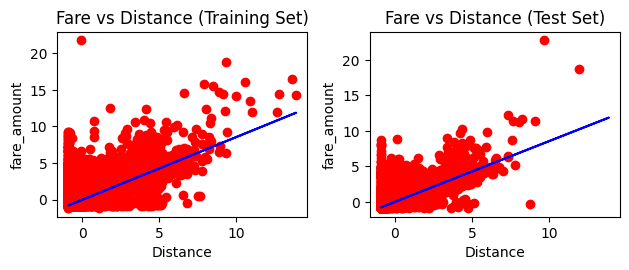

In [26]:
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")

plt.tight_layout()
plt.show()

In [27]:
cols = ['Model', 'RMSE', 'R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_metrics = pd.DataFrame([[
     "Linear Regresion model",
     np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
     np.sqrt(metrics.r2_score(y_test, y_pred))
]], columns = cols)

result_tabulation = pd.concat([result_tabulation, linreg_metrics], ignore_index=True)

result_tabulation

,Model,RMSE,R-Squared
0,Linear Regresion model,0.52012,0.856765


In [28]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_reg.fit(X_train, y_train)

/tmp/ipykernel_4027/2264728154.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=10)

In [29]:
# predict the values on test dataset using predict()
y_pred_RF = rf_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']] = y_test
result['Predicted'] = y_pred_RF

result.sample(10)

,Actual,Predicted
22675,0.663758,1.273858
33906,3.141680,2.983114
24970,-0.294094,-0.268690
2130,-0.502323,-0.474732
37173,-0.398208,-0.561876
14912,1.371736,0.793422
22183,4.026653,-0.232146
30824,-0.710552,-0.628405
13657,-0.627260,-0.557483
19036,1.205153,0.749965


In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_RF))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred_RF))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred_RF)))

Mean Absolute Error: 0.3077087698385678
Mean Absolute % Error: 2.161623761570947
Mean Squared Error: 0.33297733033643484
Root Mean Squared Error: 0.5770418791876677
R Squared (R²): 0.8201518783882692


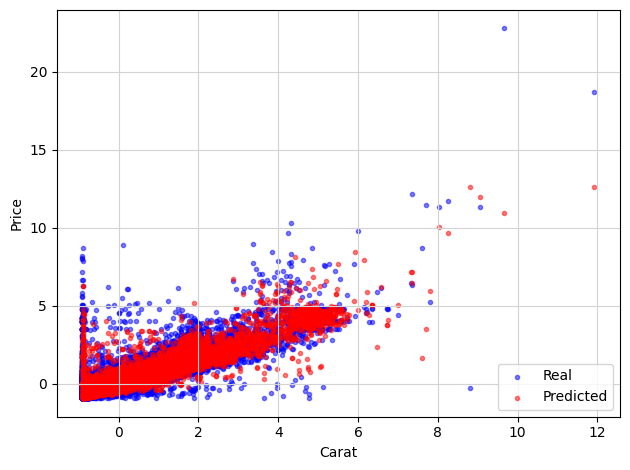

In [31]:
# Build scatterplot
plt.scatter(X_test, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(X_test, y_pred_RF, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')


plt.tight_layout()
plt.show()

In [32]:
# compile the required information
random_forest_metrics = pd.DataFrame([[
     "Random Forest Regressor model",
     np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)),
     np.sqrt(metrics.r2_score(y_test, y_pred_RF))
]], columns = cols)

result_tabulation = pd.concat([result_tabulation, random_forest_metrics], ignore_index=True)

result_tabulation

,Model,RMSE,R-Squared
0,Linear Regresion model,0.520120,0.856765
1,Random Forest Regressor model,0.577042,0.820152
